<a href="https://colab.research.google.com/github/yoohyunseok/Machine-Learnig-Deep-Learning/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 럭키 백의 확률을 구하라!!

In [95]:
#KNeighborsClassifier 사용해보기. 이웃 클래스의 비율을 확률이라고 출력
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data') #fish_csv_data 파일 dataframe으로 가져옴
fish.head() #앞에 4줄 출력(잘 가져왔나 확인)

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [96]:
print(pd.unique(fish['Species'])) #unique()로 species열의 고유한 값 추출
#어떤 종류의 생선이 있나 확인

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [97]:
#spices열을 타깃으로 만들고 나머지 열은 입력 데이터로 만들기
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']] #2차원 배열
print(fish_input[:5]) #(row, column)

   Weight  Length  Diagonal   Height   Width
0   242.0    25.4      30.0  11.5200  4.0200
1   290.0    26.3      31.2  12.4800  4.3056
2   340.0    26.5      31.1  12.3778  4.6961
3   363.0    29.0      33.5  12.7300  4.4555
4   430.0    29.0      34.0  12.4440  5.1340


In [98]:
fish_target = fish['Species'].to_numpy() #to_numpy와 to_numpy()의 차이...괄호가 있는놈은 실제로 변환해서 반환값을 반환하고 괄호가 없는놈은 실제로 바꾸진 않고 바꿨을 때의 모습만 보여준다.
print(fish_target[:])

['Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Roach'
 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach'
 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach'
 'Roach' 'Whitefish' 'Whitefish' 'Whitefish' 'Whitefish' 'Whitefish'
 'Whitefish' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki'
 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'

In [99]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [100]:
#StandardScaler를 이용한 표준화 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [101]:
#KNeighborsClassifire로 확률 예측
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [102]:
print(kn.classes_) #타깃 값을 문자열 그대로 사용할 경우 sklearn 모델에 전달 할 때 자동으로 알파벳 순서로 정렬된다.

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [103]:
print(kn.predict(test_scaled[:5])) #하지만 predict()는 친절하게 타깃값으로 예측을 출력한다..그래서 문제업슴

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [104]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5]) #predict_proba()는 각 클래스에 속할 확률을 출력한다.
print(np.round(proba, decimals = 4))#round() =>소수점 첫째 자리에서 반올림. but decimals로 유지할 소수점 아래 자릿수 지정
#[bream, Parkki, Perch, Pike, Roach, Smelt, Whitefish] 확률

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [105]:
#이 모델이 계산한 확률이 가장 가까운 이웃의 비율과 일치하는지 확인
distances, indexes = kn.kneighbors(test_scaled[3:4]) #4 번째 샘플의 이웃들
print(train_target[indexes])
#하지만 확률이 0, 0.33, 0.66, 1 뿐이라 확률이 더 다양하게 나오는 모델을 찾아야함

[['Roach' 'Perch' 'Perch']]


# 로지스틱 회귀(logistic regression)


*   이름은 회귀지만 분류 모델
*   선형 회귀 처럼 선형 방정식을 학습
    - ex) z = a x (weight) + b x (length) + c x (diagonal) + d x (height) + e x (width) + f
    - a,b,c,d,e는 가중치 또는 계수
*   여기서 z를 확률로 나타내려면 0~1 (또는 0%~100%) 사이의 값이어야함
*   sigmoid 함수(또는 logistic 함수)를 사용해서 z 값을 확률로 만듦



# sigmoid 함수
- z가 무한하게 큰 음수 => 0에 가까워짐
- z가 무한하게 큰 양수 => 1에 가까워짐
- z가 0이 될 때는 0.5가  됨
- z가 절대 0~1 사이의 값을 벗어나지 않게된다!!
- f(x) = 1/1+e^-z
- 자세한 설명과 수식은 [여기](https://gooopy.tistory.com/52)

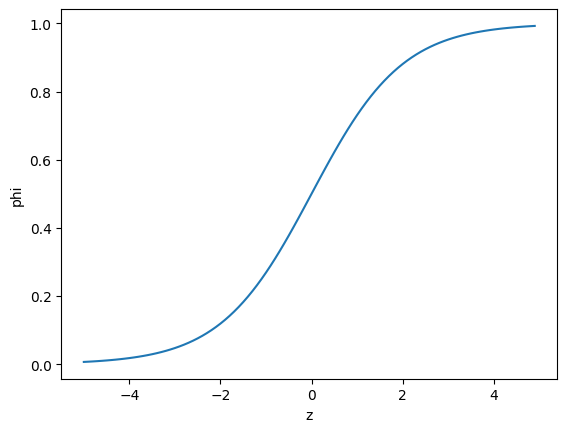

In [106]:
#sigmoid 함수 그래프 그리기
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)
phi = 1/(1/1+np.exp(-z)) #no.exp()로 지수 함수 계산
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [107]:
#로지스틱 회귀로 간단한 이진 분류
#함수 출력이 0.5 이상이면 1, 0.5 이하면 0..0.5면 라이브러리마다 다르지만 sklearn은 0으로 판별
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]]) #A와 C만 골라내기

['A' 'C']


In [108]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [109]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [110]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [111]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]


In [112]:
print(lr.classes_) #smelt(빙어)가 양성 클래스(1)

['Bream' 'Smelt']


In [113]:
print(lr.coef_, lr.intercept_)
print(lr.coef_.shape, lr.intercept_.shape)

[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]
(1, 5) (1,)


In [114]:
decisions = lr.decision_function(train_bream_smelt[:5]) #양성 클래스에 대한 z 값 반환
print(decisions)

[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]


In [115]:
from scipy.special import expit
print(expit(decisions)) #expit()으로 z 값을 시그모이드 함수에 넣어서 확률 계산
#

[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


**logistic regression으로 다중 분류 수행**

In [116]:
lr = LogisticRegression(C = 20, max_iter = 1000) #충분히 훈련시키기 위해 반복 횟수 max_iter = 1000으로 지정
#LogisticRegression에는 기본적으로 L2 규제가 적용된다. C 값으로 이 규제의 정도를 조절 할 수 있다.
#Ridge 회귀의 alpha 값과 반대로 C의 값이 작을 수록 규제의 강도가 강해진다.
#C의 기본 값은 1이며 여기서는 규제를 완화하기 위해 20으로 늘렸다.
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))
#과대 적합

0.9327731092436975
0.925


In [117]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [118]:
proba = lr.predict_proba(test_scaled[:5]) #샘플 5개에 대한 예측 확률 출력
print(np.round(proba, decimals = 3))

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [119]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [120]:
print(lr.coef_.shape, lr.intercept_.shape) #어떤 모습의 선형 방정식일까?
#(행, 열)
#행이 7개나 있다? => z 값이 7개나 계산되었다. => 다중 분류는 클래스마다 z 값을 하나씩 계산한다

(7, 5) (7,)


# 소프트맥스(softmax)함수
- sigmoid는 하나의 선형 방정식의 출력을 0~1 사이로 압축한다.
- 이와 달리 softmax는 여러개의 선형 방정식의 출력값을 0~1 사이로 압축하고 전체 합이 1이 되도록 만든다
- 계산 방식
  - 7개의 z 값을 z1, z2~z7이라고 가정
  - z1, z2 ~ z7 값을 사용해 지수함수 e^z1, e^z2 ~ e^z7 계산해서 모두 더함
  - e_sum = e^z1 + e^z2 + e^z3+ e^z4+ e^z5+ e^z6+ e^z7
  - e^z1 ~ e^z을 각각 e_sum 으로 나눔
  - s1 = e^z1/e_sum, s2 = e^z2/e_sum ~ , s7 = e^z7/e_sum
  - s1~s7을 모두 더하면 1


In [121]:
decision = lr.decision_function(test_scaled[:5]) #decision_function()으로 z 값 출력
print(np.round(decision, decimals = 2))

[[ -6.51   1.04   5.17  -2.76   3.34   0.35  -0.63]
 [-10.88   1.94   4.78  -2.42   2.99   7.84  -4.25]
 [ -4.34  -6.24   3.17   6.48   2.36   2.43  -3.87]
 [ -0.69   0.45   2.64  -1.21   3.26  -5.7    1.26]
 [ -6.4   -1.99   5.82  -0.13   3.5   -0.09  -0.7 ]]


In [122]:
from scipy.special import softmax
proba = softmax(decision, axis = 1) #softmax()로 확률 계산
print(np.round(proba, decimals = 3))

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [123]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [124]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
